<a href="https://colab.research.google.com/github/sirisha-asalla/git/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# load the cifar10 dataset
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [59]:
x_train.shape

(50000, 32, 32, 3)

In [60]:
x_test.shape

(10000, 32, 32, 3)

In [61]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

It is in 2D array.so lets convert it into 1D array

In [62]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [63]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [66]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

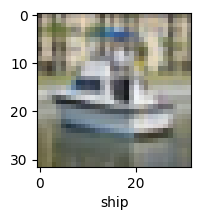

In [70]:
plot_sample(x_train,y_train,501)

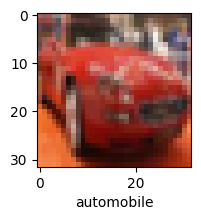

In [68]:
plot_sample(x_train,y_train,5)

In [69]:
x_train=x_train/255.0
x_test=x_test/255.0

**Build a Artifical Neural Network (ANN) for Image Classification**

In [17]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3078 - loss: 1.9238
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4227 - loss: 1.6434
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4525 - loss: 1.5529
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4794 - loss: 1.4856
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4967 - loss: 1.4366


In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element)for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [36]:
print('Classification Report:\n',classification_report(y_test,y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53      1000
           1       0.75      0.41      0.53      1000
           2       0.37      0.41      0.39      1000
           3       0.40      0.26      0.32      1000
           4       0.51      0.27      0.35      1000
           5       0.48      0.23      0.32      1000
           6       0.44      0.68      0.54      1000
           7       0.32      0.81      0.46      1000
           8       0.76      0.43      0.55      1000
           9       0.52      0.60      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



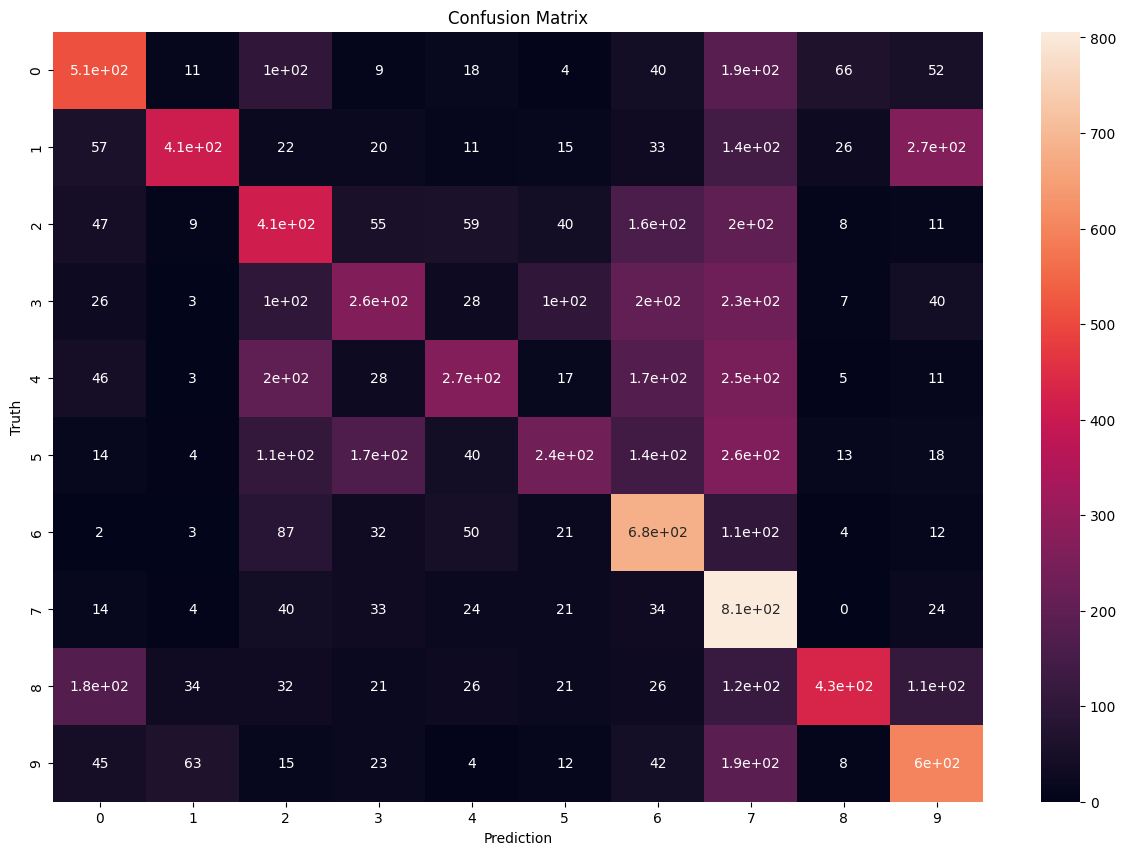

In [39]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

**Build a Convolutional Neural Network (CNN) for Image Classification**

In [44]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3855 - loss: 1.6809
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6041 - loss: 1.1333
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6603 - loss: 0.9783
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6891 - loss: 0.8943
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7164 - loss: 0.8155
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7355 - loss: 0.7536
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7547 - loss: 0.7039
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7762 - loss: 0.6527
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7903 - loss: 0.6079
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8000 - loss: 0.5749


In [50]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6965 - loss: 0.9547


[0.9725759029388428, 0.6930000185966492]

In [51]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.8584123e-03, 2.5322559e-04, 9.3219336e-03, 9.0375841e-01,
        2.7951202e-04, 3.2325998e-02, 2.4531579e-03, 9.4851403e-06,
        4.9187571e-02, 5.5235758e-04],
       [9.8996302e-03, 2.3672050e-03, 3.4668068e-05, 8.5294814e-06,
        1.6940608e-07, 5.9123169e-09, 2.3904748e-08, 8.1626666e-08,
        9.8730761e-01, 3.8205294e-04],
       [5.4691028e-02, 4.6621438e-02, 1.0481977e-02, 5.8109980e-02,
        2.2160355e-03, 6.2140180e-03, 5.3120276e-04, 2.1375522e-03,
        8.0986893e-01, 9.1278851e-03],
       [9.1866797e-01, 1.1472885e-03, 2.7308023e-02, 2.1258863e-03,
        3.9005240e-03, 2.1579228e-05, 1.3390729e-04, 2.1466132e-05,
        4.6657175e-02, 1.6211927e-05],
       [1.1895515e-07, 2.4481518e-05, 1.0758328e-02, 2.4035839e-02,
        9.3509740e-01, 3.6096382e-03, 2.6460828e-02, 6.0389989e-06,
        6.1181445e-06, 1.2540999e-06]], dtype=float32)

In [71]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [72]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [74]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

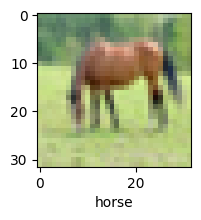

In [75]:
plot_sample(x_test,y_test,60)

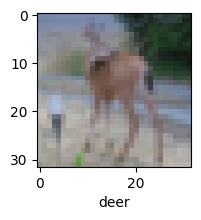

In [76]:
plot_sample(x_test,y_test,100)

In [77]:
classes[y_classes[100]]

'deer'

In [78]:
classes[y_test[60]]

'horse'

**•	Apply transfer learning using pre-trained models (e.g., VGG16, ResNet).**

In [79]:
from tensorflow.keras.applications import VGG16, ResNet50

In [80]:
# Transfer Learning with VGG16
def create_vgg16_model():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  base_model.trainable = False  # Freeze base model layers

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  return model

In [81]:
# Transfer Learning with ResNet50
def create_resnet50_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  base_model.trainable = False  # Freeze base model layers

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  return model

In [88]:
# Choose a model (VGG16 or ResNet50)
model = create_vgg16_model()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [89]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.4699 - loss: 1.5032 - val_accuracy: 0.5643 - val_loss: 1.2389
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.5883 - loss: 1.1797 - val_accuracy: 0.5886 - val_loss: 1.1751
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6101 - loss: 1.1117 - val_accuracy: 0.6005 - val_loss: 1.1360
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6259 - loss: 1.0605 - val_accuracy: 0.6028 - val_loss: 1.1319
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6454 - loss: 0.9995 - val_accuracy: 0.6144 - val_loss: 1.1078
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6596 - loss: 0.9648 - val_accuracy: 0.6159 - val_loss: 1.1074
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6753 - loss: 0.9295 - val_accuracy: 0.6226 - val_loss: 1.0902
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6864 -

**•	Evaluate the model’s performance (accuracy, confusion matrix, etc.).**

In [91]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 2s - 8ms/step - accuracy: 0.6110 - loss: 1.2770

Test accuracy: 0.6110000014305115


In [92]:
# Predictions and Classification Report
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report:\n', classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70      1000
           1       0.64      0.73      0.68      1000
           2       0.59      0.48      0.53      1000
           3       0.44      0.43      0.43      1000
           4       0.58      0.55      0.57      1000
           5       0.50      0.51      0.51      1000
           6       0.61      0.71      0.65      1000
           7       0.63      0.73      0.67      1000
           8       0.74      0.72      0.73      1000
           9       0.73      0.52      0.61      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



**•	Visualize the learning process using training curves and confusion matrices.**

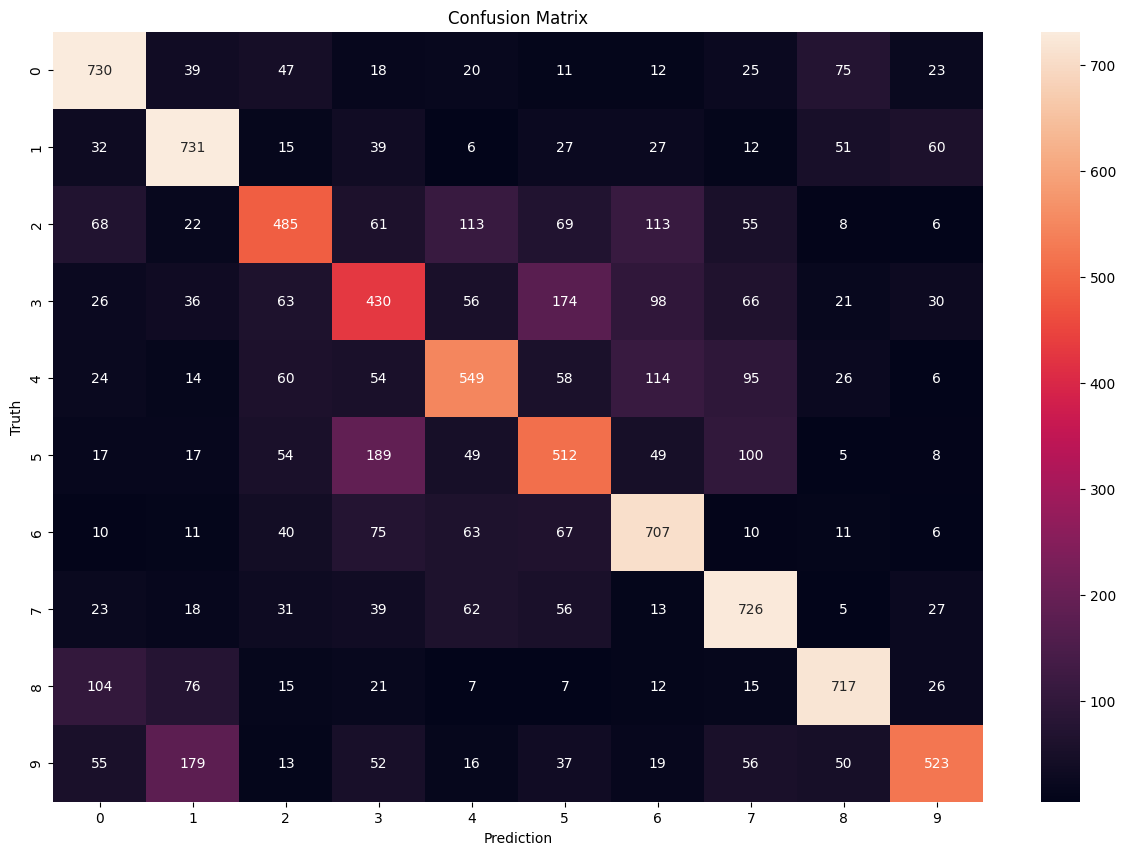

In [93]:
# Confusion Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt="d")
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

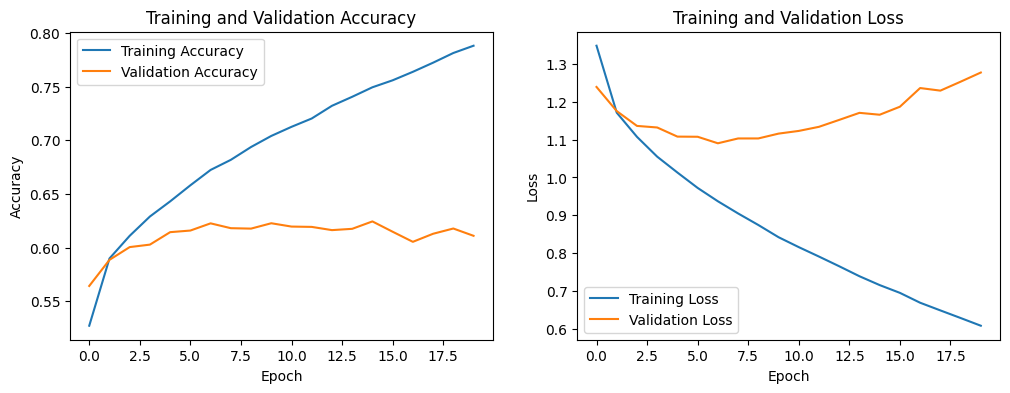

In [94]:
# Visualize learning process
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()